# IT Sector Analysis of Nifty50 Index

## Introduction

The NIFTY 50 is a benchmark Indian stock market index that represents the weighted average of 50 of the largest Indian companies listed on the National Stock Exchange. The IT Sector Analysis of Nifty50 stocks is a project related to exploratory data analysis(EDA) and data visualisation with data collected from the National Stock Exchange (NSE) India. We looked at real-time financial data from the stock market. We have used python libraries such as pandas,numpy, matplotlib, seaborn, etc. to get stock information, visualise different aspects of it, and finally work on a few ways of analysing the stock, based on its previous performance history.

We'll be answering the following questions along the way: \
•	   Composition of Nifty50 index ?  \
•	   Change in price of the IT sector stocks over a period of time ?  \
•	   Daily return of the IT sector stocks ?    \
•	   Distribution of daily return of a stock ?    \
•	   Different moving averages of a IT sector stock? \
•	   Correlation between different IT sector stocks' closing prices? \
•	   Correlation between different stocks' daily returns?
•	   Correlation between different stocks' daily returns?



## Data collection and methodology

The data is the price history and trading volumes of the fifty stocks in the index NIFTY 50 from NSE (National Stock Exchange) India. All datasets are at a day-level with pricing and trading values split across .csv files for each stock along with a metadata file with some macro-information about the stocks itself. The data spans from 1st January, 2000 to 30th April, 2021.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
nifty50 = pd.read_excel(r"E:\Data Science\Datasets\Nifty\IT\Nifty Weight.xlsx")
nifty50.head()

,Company,NSE Symbol,Industry,Weightage
0,Adani Enterprises Ltd.,ADANIENT,METALS & MINING,0.0125
1,Adani Port and Special Economic Zone Ltd.,ADANIPORTS,SERVICES,0.0078
2,Appolo Hospital,APPOLOHOSP,HEALTHCARE,0.0059
3,Asian Paints,ASIANPAINT,CONSUMER DURABLES,0.0199
4,AXIS Bank Ltd.,AXISBANK,FINANCIAL SERVICES,0.0256


In [3]:
nifty50.shape

(50, 4)

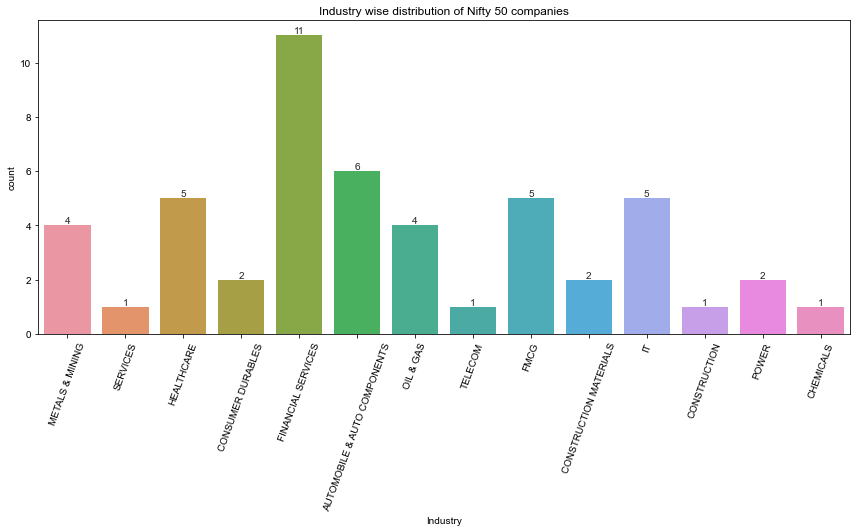

In [4]:
plt.rcParams["figure.figsize"] = [12, 7.5]
industry_plot = sns.countplot(x ='Industry', data = nifty50,)
sns.set_style('whitegrid')
plt.xticks(rotation=70)
plt.title('Industry wise distribution of Nifty 50 companies')
plt.bar_label(industry_plot.containers[0])
plt.tight_layout()

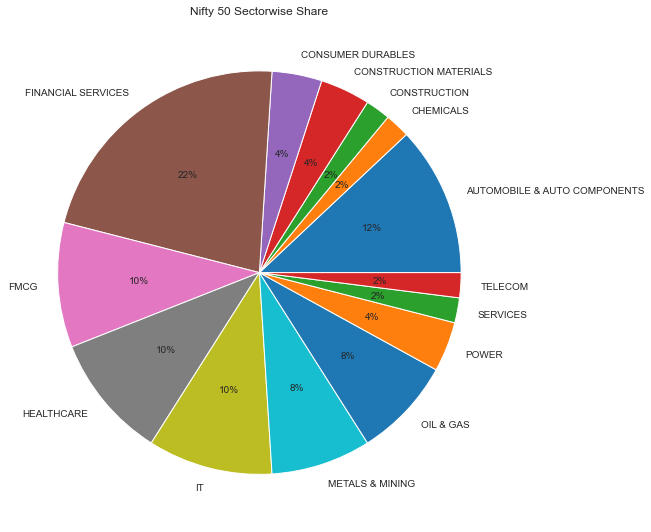

In [5]:
plt.rcParams["figure.figsize"] = [12, 7.5]
plt.pie(nifty50.groupby('Industry').count()['Company'], labels= nifty50.groupby('Industry').count().index ,autopct='%.0f%%')
plt.title('Nifty 50 Sectorwise Share')
plt.tight_layout()

### The above bar chart represents the number of companies by sector in the Nifty50 Index. And the pie chart represents the sector-wise share of the Nifty50 Index.

## Observation:
The financial services industry dominates the Nifty50 Index with 11 companies, which accounted for around 22% of the total index, followed by automobiles and auto components, with 6 companies and a 12% share. The IT (Information Technology), healthcare, and FMCG sectors each account for 10% of the Nifty50 index.

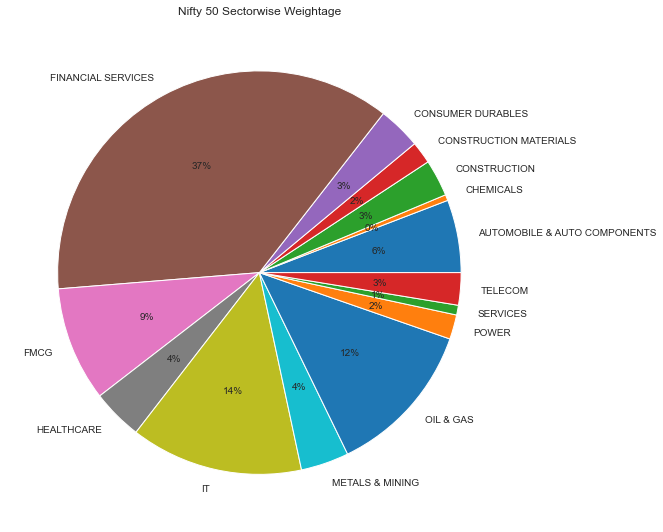

In [87]:
df = nifty50.groupby('Industry').sum().reset_index()
plt.rcParams["figure.figsize"] = [12, 7.5]
plt.pie(df['Weightage'],labels = df.Industry ,autopct='%.0f%%')
plt.title('Nifty 50 Sectorwise Weightage')
plt.tight_layout()

### The pie chart represents the sector weightage in the Nifty50 Indices.

### Stock Weightage

**It is a combination of the market cap and the free float. So only that portion of the market that is free float (not owned by promoters and connected persons) is considered for weighting in the index. This gives a truer picture of the importance of the market.**

## Observation:
From the pie chart, it is observed that the financial services sector holds more than 1/3rd of nifty50 index in terms of weightage. The IT sector ranks 2nd with around 14% weightage and holds a significant position in the Nifty50 Index.

### For the further analysis we selected the IT sector stocks

In [8]:
IT = nifty50[nifty50.Industry == 'IT'].reset_index(drop=1)
IT

,Company,NSE Symbol,Industry,Weightage
0,HCL Technologies Ltd.,HCLTECH,IT,0.0130
1,Infosys Ltd.,INFY,IT,0.0684
2,Tata Consultancy Services Ltd.,TCS,IT,0.0407
3,Tech Mahindra Ltd.,TECHM,IT,0.0084
4,Wipro Ltd.,WIPRO,IT,0.0077


### The below chart is imported from Tableau which shows the Market Cap of IT sector stocks in Nifty50.

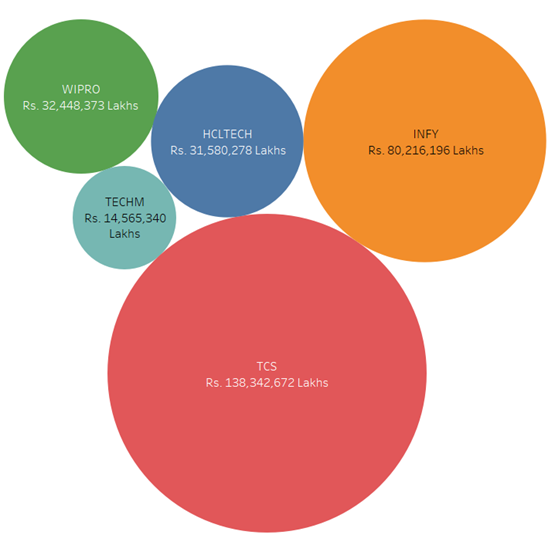

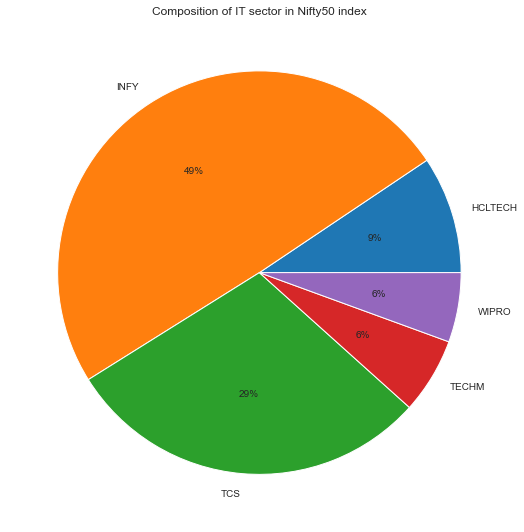

In [7]:
plt.pie(IT['Weightage'],labels = IT['NSE Symbol'] ,autopct='%.0f%%')
plt.title('Composition of IT sector in Nifty50 index')
plt.tight_layout()

## Observation:
From the above two charts its is observed that although the market cap of Infosys is 3/5th  that of TCS, it has a higher weightage in the Nifty compared to TCS as the stock of TCS is still 74% owned by Tata Sons.


In [9]:
#importing HCLtech data and performing further analysis 
HCL = pd.read_csv(r"E:\Data Science\Datasets\Nifty\IT\HCLTECH.csv")
HCL.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.0,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.0,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.0,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.3,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.0,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN


In [10]:
HCL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5300 entries, 0 to 5299
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5300 non-null   object 
 1   Symbol              5300 non-null   object 
 2   Series              5300 non-null   object 
 3   Prev Close          5300 non-null   float64
 4   Open                5300 non-null   float64
 5   High                5300 non-null   float64
 6   Low                 5300 non-null   float64
 7   Last                5300 non-null   float64
 8   Close               5300 non-null   float64
 9   VWAP                5300 non-null   float64
 10  Volume              5300 non-null   int64  
 11  Turnover            5300 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.2

In [11]:
#Converting Date to Datetime datatype and setting it as an Index of the DataFrame

HCL['Date'] = pd.to_datetime(HCL['Date'])
HCL.set_index('Date',inplace = True)

In [12]:
# Droping the columns which are not required for the further analysis

HCL.drop(['Series','Prev Close','Last','VWAP','Turnover','Trades','Deliverable Volume','%Deliverble'],axis = 1,inplace =True)

In [13]:
HCL.head(2)

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2000-01-11,HCLTECH,1550.0,1725.00,1492.0,1554.45,1192200
2000-01-12,HCLTECH,1560.0,1678.85,1560.0,1678.85,344850


**We are going to perform the Exploratory Data Analysis (EDA) on the past five years data of each selected stock**

In [14]:
# Selecting last five years data from the dataset

HCL_5 = HCL[HCL.index > '2016-04-30']
HCL_5.head(2)

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2016-05-02,HCLTECH,750.0,756.30,740.10,742.2,2510583
2016-05-03,HCLTECH,747.0,747.55,726.05,728.4,3499904


In [15]:
HCL_5.describe()

,Open,High,Low,Close,Volume
count,1239.000000,1239.000000,1239.000000,1239.000000,1.239000e+03
mean,871.935028,882.477078,860.611380,871.255609,3.197542e+06
std,165.189367,165.999901,163.548035,164.755783,3.352289e+06
min,410.000000,428.600000,375.250000,405.800000,2.919400e+04
25%,794.950000,803.875000,783.275000,793.050000,1.293648e+06
50%,878.450000,886.900000,868.950000,878.300000,1.975925e+06
75%,997.000000,1008.400000,979.625000,993.225000,3.917210e+06
max,1170.000000,1187.600000,1156.500000,1183.350000,3.231253e+07


## Observation: 
1. Maximum price of the stock reached 1187.60
2. Minimum price of the stock reached 375.25
3. Average daily traded volume of the stock is 3197542 
4. No. of trading days in the above time period is 1239

# Basic Analysis of Stock Information 

**In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock**

<AxesSubplot:xlabel='Date', ylabel='Close'>

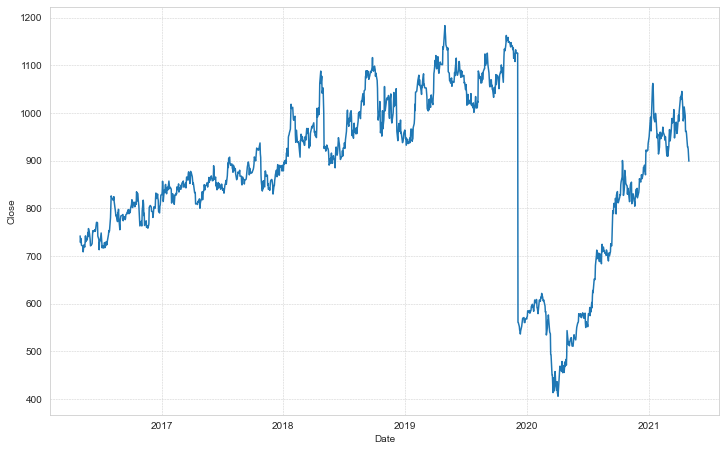

In [16]:
#Plotting the lineplot of stock closing price

plt.grid( linestyle = '--', linewidth = 0.5)
sns.lineplot(x = 'Date', y ='Close', data = HCL_5)

## Observation:
From the above line plot we can that there is a sharp fall in HCL closing price between 2019-12-04 and 2019-12-05, this is occurred due to the stock got split in the ratio of 1:2.  



#### Stock Split
**A stock split or stock divide increases the number of shares in a company. For example, after a 2-for-1 split, each investor will own double the number of shares, and each share will be worth half as much. A stock split causes a decrease of market price of individual shares, but does not change the total market capitalization of the company: stock dilution does not occur.**



### But this closing price does not reflect a true picture of the returns of the stock. Therefore, we have to add a new column where we calculate the split adjusted price of each stock.

In [17]:
# Adding a column (Split_Adj_Price)
HCL_5['Split_Adj_Price'] = HCL_5['Close']

# Calculating the split Adjusted Price  
HCL_5.loc[HCL_5.index < '2019-12-05', 'Split_Adj_Price'] = HCL_5['Split_Adj_Price']/2

HCL_5.loc[(HCL_5.index >='2019-12-02') &  (HCL_5.index <= '2019-12-08')]

,Symbol,Open,High,Low,Close,Volume,Split_Adj_Price
Date,,,,,,,
2019-12-02,HCLTECH,1139.00,1139.00,1123.50,1125.30,1497958,562.650
2019-12-03,HCLTECH,1129.95,1131.00,1121.00,1124.55,1783831,562.275
2019-12-04,HCLTECH,1127.00,1130.00,1116.45,1125.50,2951568,562.750
2019-12-05,HCLTECH,563.80,567.65,557.15,560.90,2683884,560.900
2019-12-06,HCLTECH,563.90,567.05,558.65,560.30,1659752,560.300


<AxesSubplot:xlabel='Date', ylabel='Split_Adj_Price'>

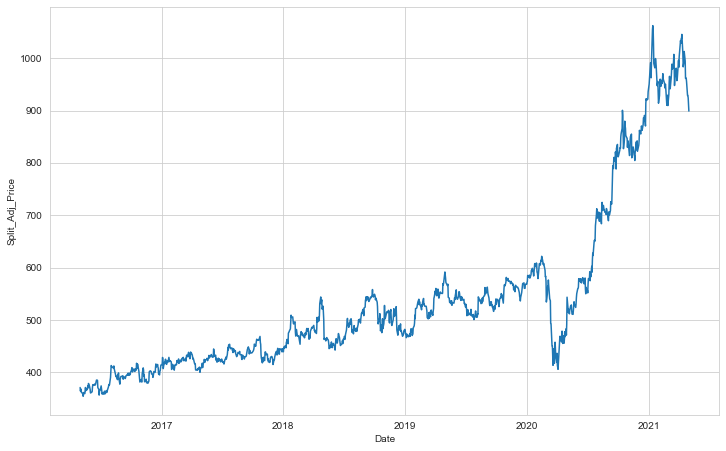

In [18]:
sns.lineplot(x = 'Date', y = 'Split_Adj_Price', data = HCL_5)

The above chart show the Split adusted closing price wrt to Date

### Similar Analysis will be performed for the rest of the Stocks

In [19]:
#Importing data of the remaining IT Stocks

INFY = pd.read_csv(r"E:\Data Science\Datasets\Nifty\IT\INFY.csv",usecols=['Date','Symbol','Open','High','Low','Close','Volume'],parse_dates =['Date'],index_col= ['Date'] )
TCS = pd.read_csv(r"E:\Data Science\Datasets\Nifty\IT\TCS.csv",usecols=['Date','Symbol','Open','High','Low','Close','Volume'],parse_dates =['Date'],index_col= ['Date'])
TECHM = pd.read_csv(r"E:\Data Science\Datasets\Nifty\IT\TECHM.csv",usecols=['Date','Symbol','Open','High','Low','Close','Volume'],parse_dates =['Date'],index_col= ['Date'])
WIPRO = pd.read_csv(r"E:\Data Science\Datasets\Nifty\IT\WIPRO.csv",usecols=['Date','Symbol','Open','High','Low','Close','Volume'],parse_dates =['Date'],index_col= ['Date'])

In [20]:
#Selecting past five years data for further analysis

INFY_5 = INFY[INFY.index > '2016-04-30' ]
TCS_5 = TCS[TCS.index > '2016-04-30' ]
TECHM_5 = TECHM[TECHM.index > '2016-04-30' ]
WIPRO_5 = WIPRO[WIPRO.index > '2016-04-30' ]

<AxesSubplot:xlabel='Date', ylabel='Close'>

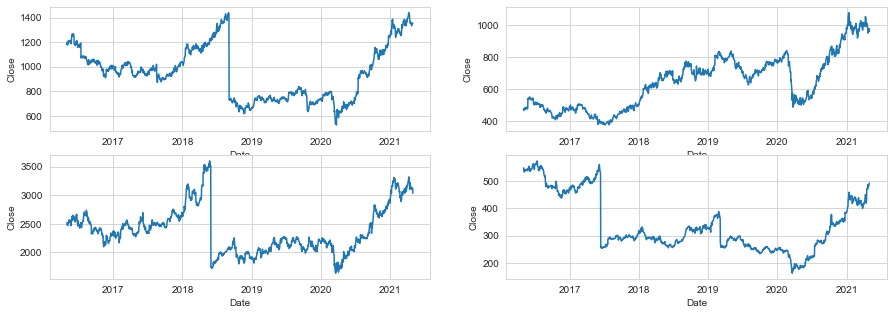

In [21]:
#Ploting the lineplot of each stock closing price, and analysing is their any stock split happened or not

fig, ax = plt.subplots(2,2,figsize = (15,5))
sns.lineplot(x = 'Date', y = 'Close', data = INFY_5,ax = ax[0,0])
sns.lineplot(x = 'Date', y = 'Close', data = TCS_5,ax = ax[1,0])
sns.lineplot(x = 'Date', y = 'Close', data = TECHM_5,ax = ax[0,1])
sns.lineplot(x = 'Date', y = 'Close', data = WIPRO_5,ax = ax[1,1])

## Observation:
From the above lineplots, it is clear that Infosys and TCS split once, whereas Wipro stock got split twice in the past five years.

In [22]:
#Adding a column (Split_Adj_Price) and adjusting the histosic price as per the stock split ratio

INFY_5['Split_Adj_Price'] = INFY_5['Close']
INFY_5.loc[INFY_5.index < '2018-09-04', 'Split_Adj_Price'] = INFY_5['Split_Adj_Price']/2

TCS_5['Split_Adj_Price'] = TCS_5['Close']
TCS_5.loc[INFY_5.index < '2018-05-31', 'Split_Adj_Price'] = TCS_5['Split_Adj_Price']/2

TECHM_5['Split_Adj_Price'] = TECHM_5['Close']

WIPRO_5['Split_Adj_Price'] = WIPRO_5['Close']
WIPRO_5.loc[WIPRO_5.index < '2019-03-06', 'Split_Adj_Price'] = WIPRO_5['Split_Adj_Price']*2/3
WIPRO_5.loc[WIPRO_5.index < '2017-06-13', 'Split_Adj_Price'] = WIPRO_5['Split_Adj_Price']/2
WIPRO_5['Split_Adj_Price'] = WIPRO_5.Split_Adj_Price.round(2)

<AxesSubplot:xlabel='Date', ylabel='Split_Adj_Price'>

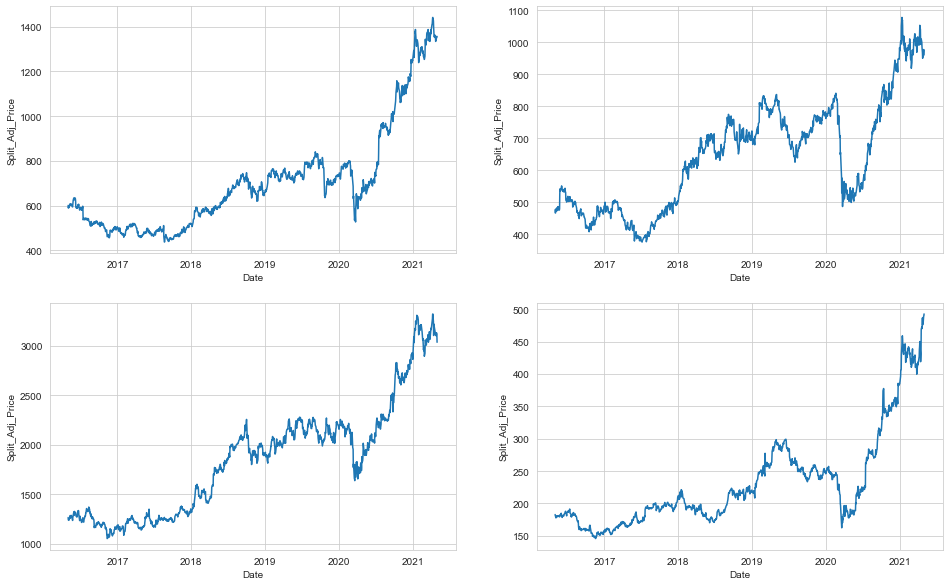

In [23]:
#Ploting lineplots of split adjusted closing price of each stock

fig, ax = plt.subplots(2,2,figsize = (16,10))
sns.lineplot(x = 'Date', y = 'Split_Adj_Price', data = INFY_5,ax = ax[0,0],)
sns.lineplot(x = 'Date', y = 'Split_Adj_Price', data = TCS_5,ax = ax[1,0])
sns.lineplot(x = 'Date', y = 'Split_Adj_Price', data = TECHM_5,ax = ax[0,1])
sns.lineplot(x = 'Date', y = 'Split_Adj_Price', data = WIPRO_5,ax = ax[1,1])

# Daily Return Analysis 

**Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the daily return of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the HCLTECH stock.**

In [24]:
# Calculating the daily % change of the HCLTECH stock closing price 

HCL_5['% Change'] = HCL_5['Split_Adj_Price'].pct_change()*100
HCL_5.head(5)

,Symbol,Open,High,Low,Close,Volume,Split_Adj_Price,% Change
Date,,,,,,,,
2016-05-02,HCLTECH,750.00,756.30,740.10,742.2,2510583,371.10,NaN
2016-05-03,HCLTECH,747.00,747.55,726.05,728.4,3499904,364.20,-1.859337
2016-05-04,HCLTECH,727.00,740.50,726.25,737.1,3202055,368.55,1.194399
2016-05-05,HCLTECH,736.80,739.80,725.50,732.9,2538933,366.45,-0.569801
2016-05-06,HCLTECH,732.95,732.95,721.00,722.6,3068239,361.30,-1.405376


In [25]:
# Calculating the daily % change of all other stock closing price

INFY_5['% Change'] = INFY_5['Split_Adj_Price'].pct_change()*100
TCS_5['% Change'] = TCS_5['Split_Adj_Price'].pct_change()*100
TECHM_5['% Change'] = TECHM_5['Split_Adj_Price'].pct_change()*100
WIPRO_5['% Change'] = WIPRO_5['Split_Adj_Price'].pct_change()*100


In [26]:
# Selecting past one year data to perform the stock daily return analysis 

HCL_1 = HCL_5[HCL_5.index > '2020-04-30' ]
INFY_1 = INFY_5[INFY_5.index > '2020-04-30' ]
TCS_1 = TCS_5[TCS_5.index > '2020-04-30' ]
TECHM_1 = TECHM_5[TECHM_5.index > '2020-04-30' ]
WIPRO_1 = WIPRO_5[WIPRO_5.index > '2020-04-30' ]

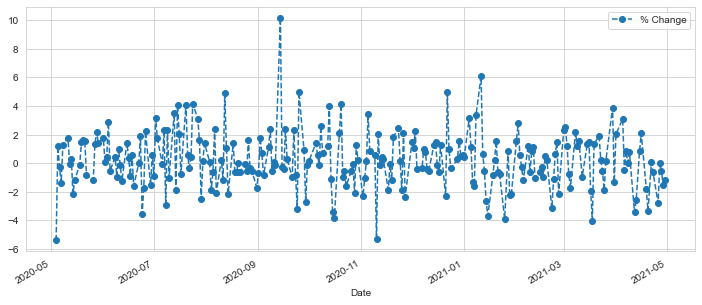

In [27]:
# plotting the daily return percentage for HCL tech stock

HCL_1['% Change'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')
plt.show()

**From the above plot we can conclude that the HCLTECh stock mostly moved in between +2% to -2%. The plot helps us to find out some exceptional days where the stock moved by some large percenage** 

 plotting the daily return percentage for Infosys stock, imported from Tableau

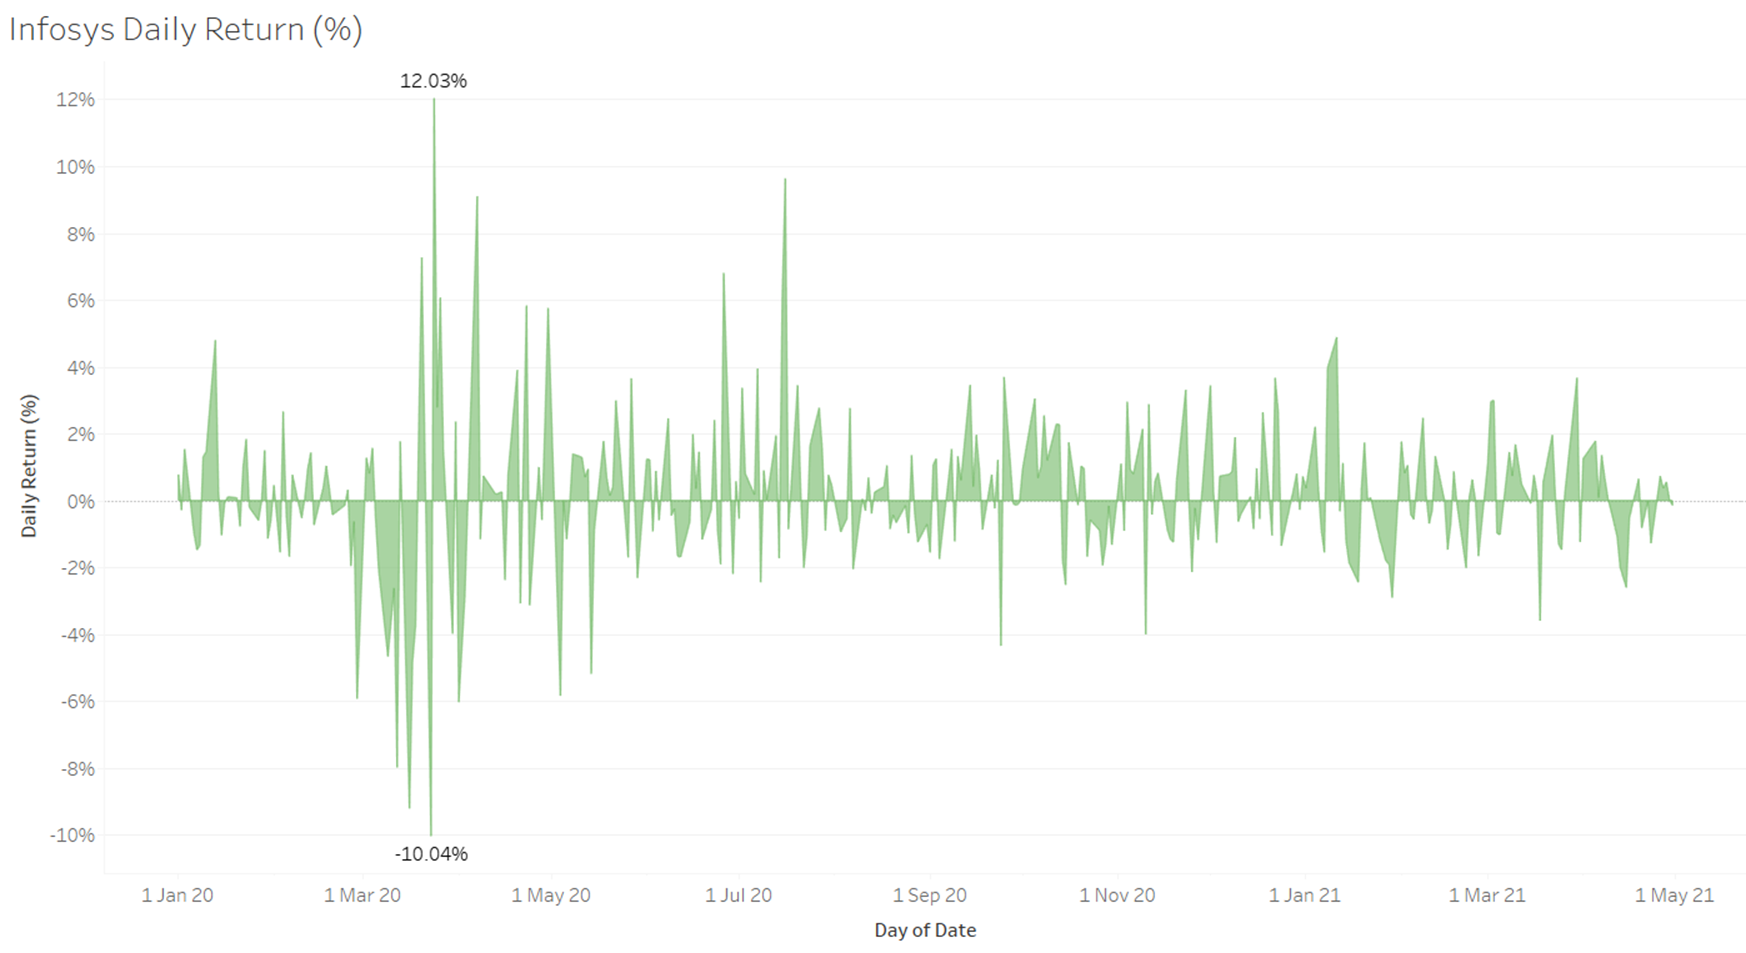

## Observation:
The maximum and the minimum daily % change for Infosys was 12.03 % and -10.04% respectively in the above period


<AxesSubplot:xlabel='Date', ylabel='% Change'>

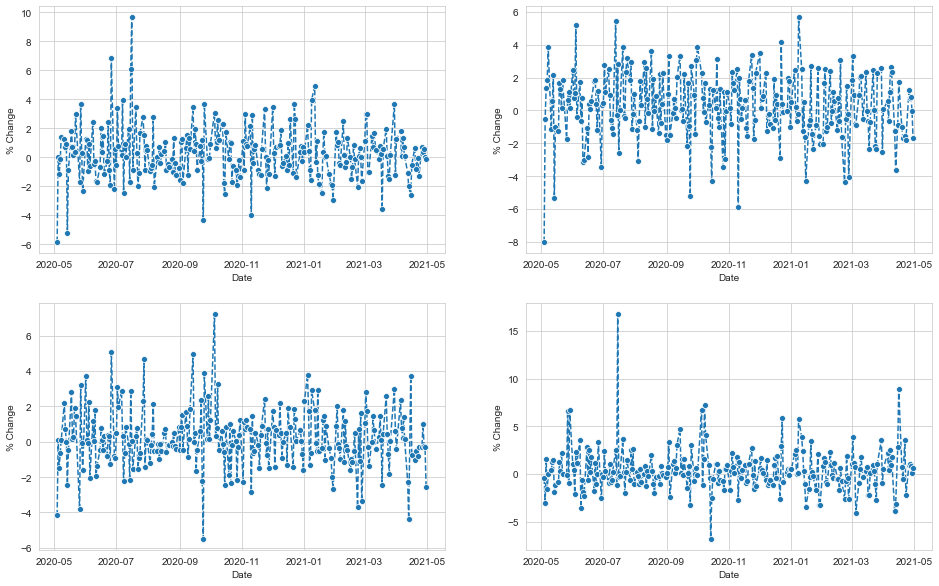

In [28]:
#Perming Similar daily return analysis for all other stocks

fig, ax = plt.subplots(2,2,figsize = (16,10))
sns.lineplot(x = 'Date', y = '% Change', data = INFY_1,ax = ax[0,0],legend=True,linestyle='--',marker='o')
sns.lineplot(x = 'Date', y = '% Change', data = TCS_1,ax = ax[1,0],legend=True,linestyle='--',marker='o')
sns.lineplot(x = 'Date', y = '% Change', data = TECHM_1,ax = ax[0,1],legend=True,linestyle='--',marker='o')
sns.lineplot(x = 'Date', y = '% Change', data = WIPRO_1,ax = ax[1,1],legend=True,linestyle='--',marker='o')

# Stock Daily Return Distribution Analysis

**Now let's get an overall look at the average daily return using a histogram and boxplot. We'll use seaborn libraray to create both a histogram and boxplot.**

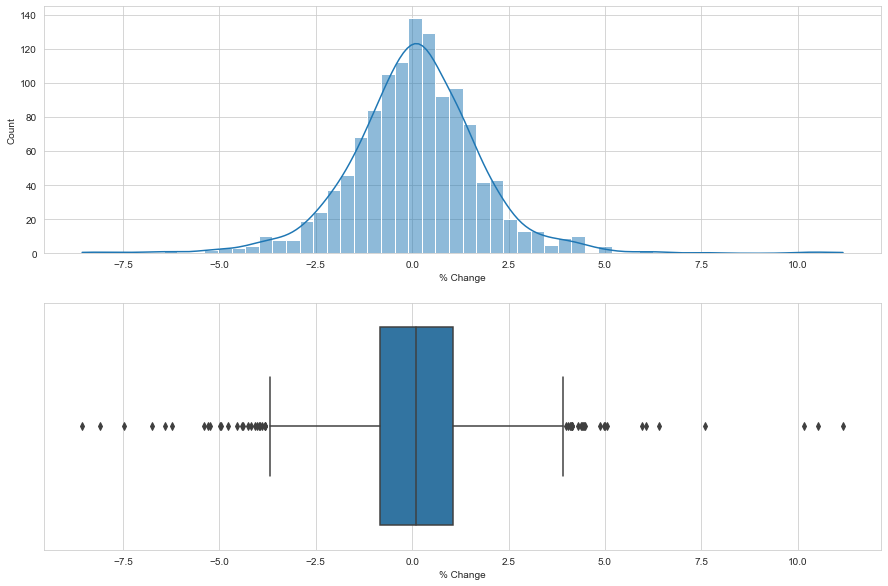

In [37]:
fig, ax = plt.subplots(2,figsize = (15,10))
sns.histplot(x='% Change', data = HCL_5,legend = 'Symbol',kde =True,ax = ax[0])
sns.boxplot(x='% Change', data = HCL_5,ax = ax[1])
plt.show()

## Observation:
From the above histogram we can conclude that the distribution of daily return (%) of HCLTECH stock is almost normally Distributed. 

Also from the boxplot it is observed that absolute daily  %change of above 3.75% can be termed as outliers.

**Below graph is imported from the Tableua, where we performed similar analysis on the TCS stock daily return over a different period of time.**

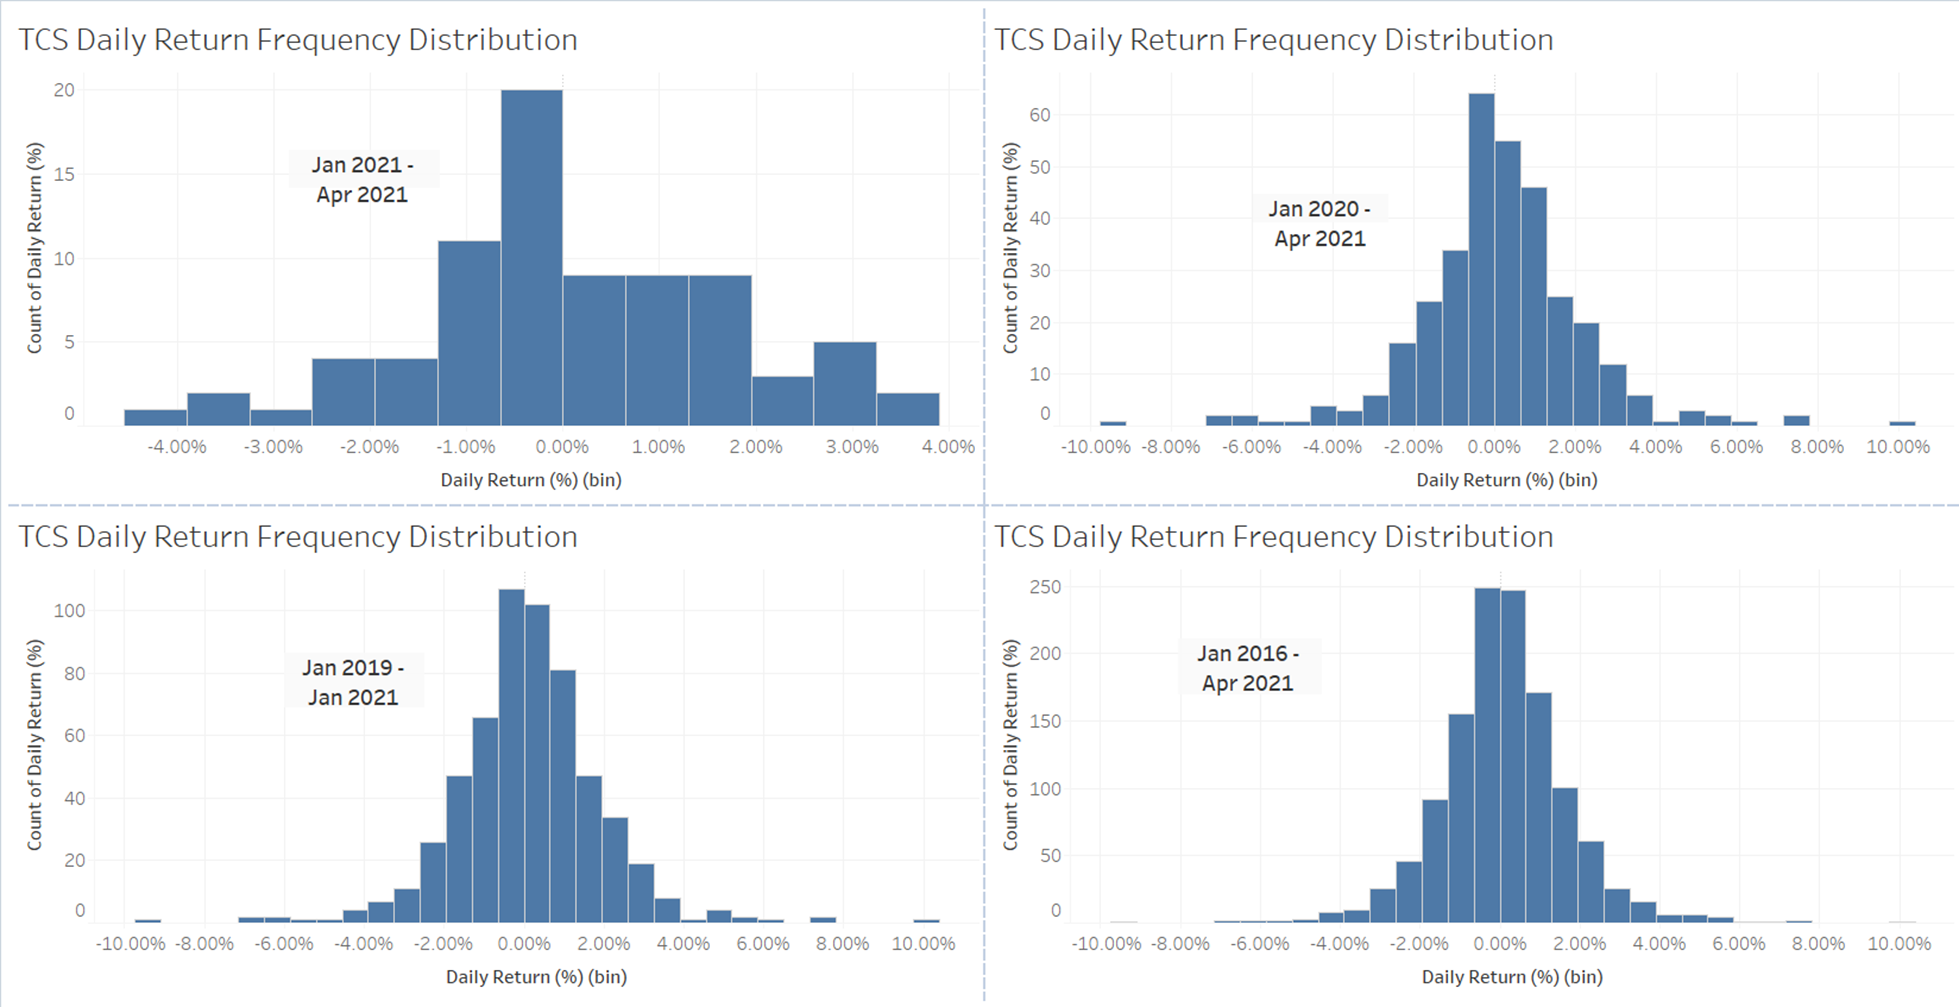

## Observation:
As we can see with the increase in the time period, the distriution of the daily return is becoming normal

# Let's go ahead and caculate the moving average for the stock.

## 'Moving Average - MA'

A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.

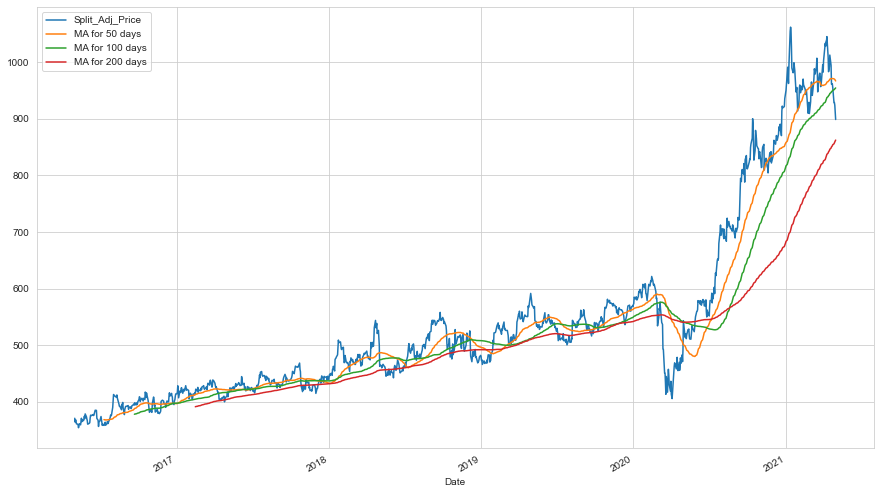

In [38]:
#Calculating and plotting 50 days, 100 days, and 200 days moving average of HCLTECH stock

ma_day = [50,100,200]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    HCL_5[column_name]=pd.DataFrame.rolling(HCL_5['Split_Adj_Price'],ma).mean()

HCL_5[['Split_Adj_Price','MA for 50 days','MA for 100 days','MA for 200 days']].plot(subplots=False,figsize=(15,9))
plt.show()

**Now we want to analyze the returns of all the stocks in our list. Let's go ahead and build a DataFrame with all the ['Split_Adj_Price'] columns for each of the stocks dataframes.**

In [113]:
closing_df1 = pd.DataFrame(HCL_5['Split_Adj_Price'])
close1  = closing_df1.rename(columns={"Split_Adj_Price": "HCL_close"})

closing_df2 = pd.DataFrame(INFY_5['Split_Adj_Price'])
close2  = closing_df2.rename(columns={"Split_Adj_Price": "INFY_close"})

closing_df3 = pd.DataFrame(TCS_5['Split_Adj_Price'])
close3  = closing_df3.rename(columns={"Split_Adj_Price": "TCS_close"})

closing_df4 = pd.DataFrame(TECHM_5['Split_Adj_Price'])
close4  = closing_df4.rename(columns={"Split_Adj_Price": "TECHM_close"})

closing_df5 = pd.DataFrame(WIPRO_5['Split_Adj_Price'])
close5  = closing_df5.rename(columns={"Split_Adj_Price": "WIPRO_close"})

closing_df = pd.concat([close1, close2, close3, close4, close5], axis=1)
closing_df.head()

,HCL_close,INFY_close,TCS_close,TECHM_close,WIPRO_close
Date,,,,,
2016-05-02,371.10,600.525,1263.35,477.20,182.83
2016-05-03,364.20,588.900,1239.05,467.20,181.28
2016-05-04,368.55,594.425,1239.00,466.95,180.00
2016-05-05,366.45,596.225,1235.15,479.35,181.03
2016-05-06,361.30,590.750,1236.70,473.05,177.70


# Correlation between two stock of IT sector

**Now we can compare the daily closing price of two stocks to check how correlated.**

In [114]:
corr = closing_df.corr()

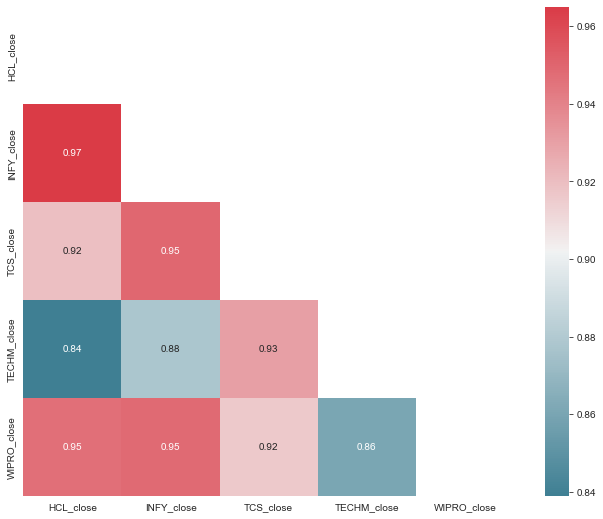

In [115]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask, cmap=cmap,annot = True)
plt.show()

## Observation:
From the aove chart we can conclude that the daily closing price of HCLTECH and Infosys (INFY) shows the highest correlation (97%)

In [116]:
# let's go ahead and get the daily return for all the stocks.

change_df = (closing_df.pct_change()*100).round(2)
change_df.rename(columns = {'HCL_close':'HCL_change','INFY_close':'INFY_change','TCS_close':'TCS_change','TECHM_close':'TECHM_change','WIPRO_close':'WIPRO_change'}, inplace = True )
change_df.head()

,HCL_change,INFY_change,TCS_change,TECHM_change,WIPRO_change
Date,,,,,
2016-05-02,NaN,NaN,NaN,NaN,NaN
2016-05-03,-1.86,-1.94,-1.92,-2.10,-0.85
2016-05-04,1.19,0.94,-0.00,-0.05,-0.71
2016-05-05,-0.57,0.30,-0.31,2.66,0.57
2016-05-06,-1.41,-0.92,0.13,-1.31,-1.84


In [117]:
# Performring similar analysis on daily returns

corr1 = change_df.corr()

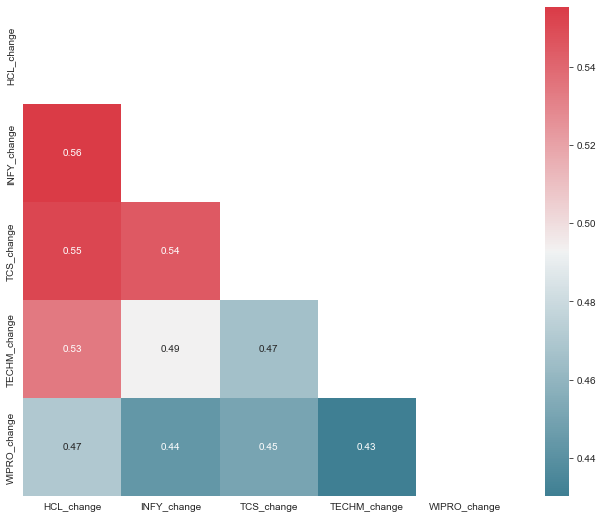

In [118]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr1,mask=mask, cmap=cmap,annot = True)
plt.show()

## Observation:
From the above chart we can conclude that the daily % change of HCLTECH and Infosys (INFY) shows the highest correlation (56%)

## Return on Investment

**Now we want to see that if we have invested Rs 10,000 on 02-05-2016 in each IT sector stock, then which stock will give us the highest return by the end of 30-04-2021**

In [119]:
change_df[['HCL_return','INFY_return','TCS_return', 'TECHM_return', 'WIPRO_return']] = 10000 

In [120]:
change_df.head(2)

,HCL_change,INFY_change,TCS_change,TECHM_change,WIPRO_change,HCL_return,INFY_return,TCS_return,TECHM_return,WIPRO_return
Date,,,,,,,,,,
2016-05-02,NaN,NaN,NaN,NaN,NaN,10000,10000,10000,10000,10000
2016-05-03,-1.86,-1.94,-1.92,-2.1,-0.85,10000,10000,10000,10000,10000


In [121]:
change_df['HCL_return'] = (1 + change_df['HCL_change']/100).cumprod()*10000
change_df['INFY_return'] = (1 + change_df['INFY_change']/100).cumprod()*10000
change_df['TCS_return'] = (1 + change_df['TCS_change']/100).cumprod()*10000
change_df['TECHM_return'] = (1 + change_df['TECHM_change']/100).cumprod()*10000
change_df['WIPRO_return'] = (1 + change_df['WIPRO_change']/100).cumprod()*10000
change_df.head()

,HCL_change,INFY_change,TCS_change,TECHM_change,WIPRO_change,HCL_return,INFY_return,TCS_return,TECHM_return,WIPRO_return
Date,,,,,,,,,,
2016-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-03,-1.86,-1.94,-1.92,-2.10,-0.85,9814.000000,9806.000000,9808.000000,9790.000000,9915.000000
2016-05-04,1.19,0.94,-0.00,-0.05,-0.71,9930.786600,9898.176400,9808.000000,9785.105000,9844.603500
2016-05-05,-0.57,0.30,-0.31,2.66,0.57,9874.181116,9927.870929,9777.595200,10045.388793,9900.717740
2016-05-06,-1.41,-0.92,0.13,-1.31,-1.84,9734.955163,9836.534517,9790.306074,9913.794200,9718.544534


<AxesSubplot:xlabel='Date'>

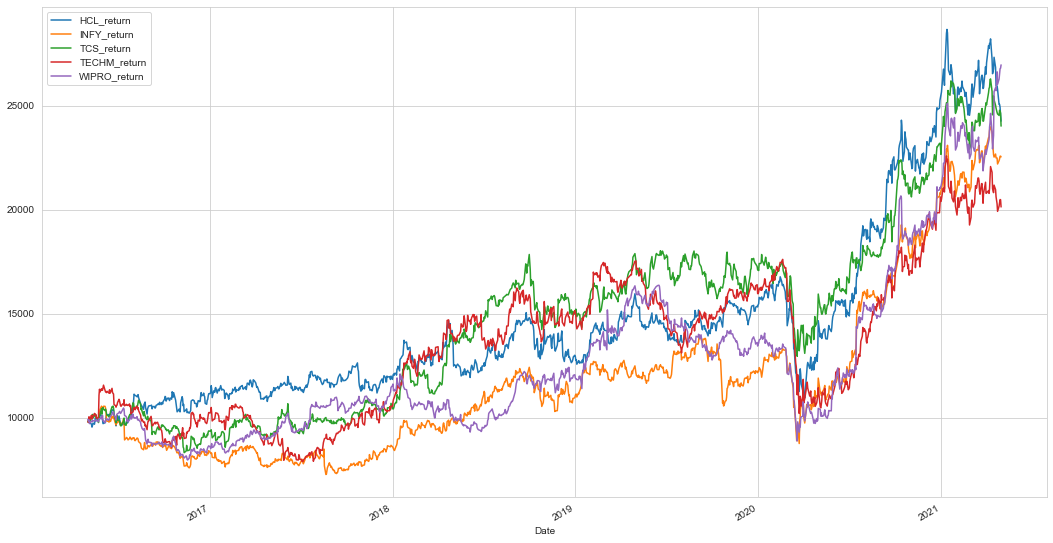

In [122]:
change_df[['HCL_return','INFY_return','TCS_return','TECHM_return','WIPRO_return']].plot(subplots=False,figsize=(18,10))

 **The below graph is imported from Tableau where we can see the return of different stocks that we got on an investment of Rs 10,000 by the end of five years.**
 

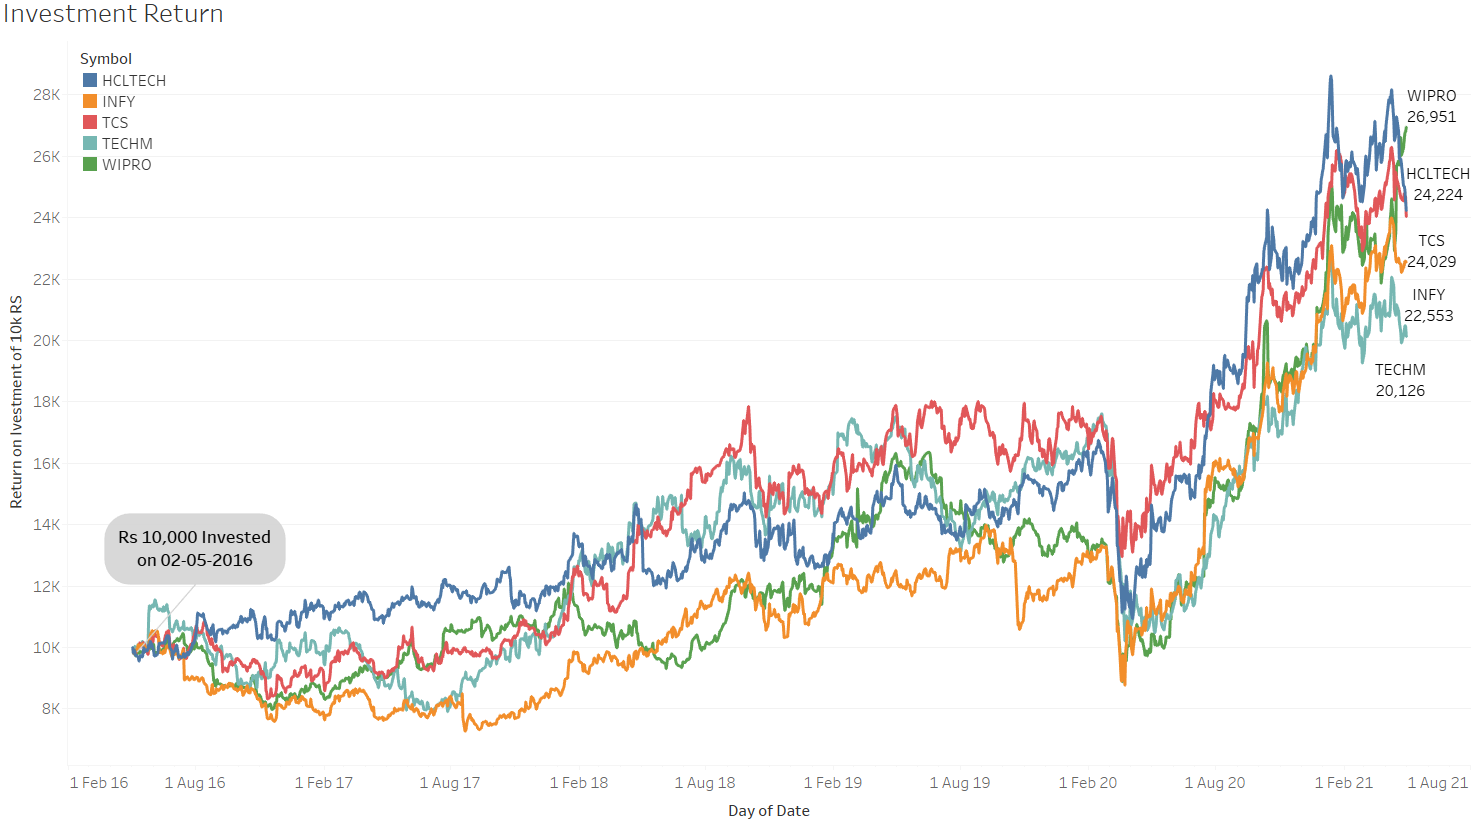

## Observation:
WIPRO stock has delivered the highest return and  grown the investment by about 2.7X , followed by HCLTECH and TCS (2.4X) 

# Conclusion and recommendations

 - Based on the above EDA WIPRO has given the highest return, however the risk associated with it is not quantified
 - Daily percentage change in a long time frame follows a normal distribution
 - Out of all the IT stocks Infosys has the highest weightage in the NIFTY50 and contributes about half of the weightage of IT stocks in NIFTY50
 
 - Further risk analysis can be performed to find the optimum stock that has a high return and at the same time has low risk associated with it
 - Time series analysis can be done to predict the future trend of the stock